**Week:** 9

**Assignment from Group:** Uptight Wealth

**Link:** https://github.com/Micniks/Python-Week9-Group-3-Assignments

# Assignment 1: Identify the Families
*This assignment is meant to make a setup for the two others below, and needs to be completed before the assignement 2 & 3*

1. Read in the surnames from the file italian_surnames.txt into a list.
2. Make two support method make_enemies & owes_money, that should take a list of surnames (from Assignment 1.1), and return a mafia_graph where surnames have been randomly connected to each other as following:
3. make_enemies will connect each surname with a list of 5 other randomly selected surnames. These will be considered rival mafia families, like this:
```{ 'Tony' : ['Giovanni', 'Rizzi', 'Caruso', 'Gallo', 'Fontana'], 'Giovanni' : ['Tony', 'Rizzi', 'Ferrari', 'Conte', 'Serra'], 'Rizzi' : ['Giovanni', 'Tony', 'Martini', 'Ferri', 'Longo'] }```
4. owes_money will connect each surname with a dict of 5 other randomly selected surnames as keys, and a random amount between 10.000 and 100.000 as values. These will be considered what the family owes other families, like this:
```{ 'Tony' : {'Giovanni' : 10000, 'Rizzi': 20000}, 'Vitale' : {'Rossetti' : 10000, 'Martino': 20000}, 'Carbone' : {'Riva' : 10000, 'Tony': 20000} }```

In [5]:
import requests
import random
import networkx as nx

url = "https://raw.githubusercontent.com/Micniks/Python-Week9-Group-3-Assignments/main/italian_surnames.txt"
amount_of_rivals = 5
amount_of_depts = 5
min_dept = 10000
max_dept = 100000
max_families = 20

# 1.1
response = requests.get(url)
full_read = ''
for line in response:
    decoded_line = line.decode("utf-8")
    full_read = full_read + decoded_line

full_surnames_list = full_read.split('\n');
surnames_list = []
if(len(full_surnames_list) <= max_families): 
    surnames_list = full_surnames_list
else:
    surnames_list = full_surnames_list[:20]
#print(surnames)

#1.2 / 1.3
def make_enemies(surnames_list):
    
    mafia_graph = nx.DiGraph() 
    mafia_graph.clear()
    
    rivalries = []

    for surname in surnames_list:
        # Add Node for Surname
        mafia_graph.add_node(surname)
        
        # Add Edges to other Surnames
        family_rivalries = []
        while(len(family_rivalries) < amount_of_rivals):
            random_int = random.randint(0, len(surnames_list)-1)
            random_rival = surnames_list[random_int]
            if random_rival != surname and random_rival not in family_rivalries:
                family_rivalries.append(random_rival)
                
        for rival in family_rivalries:
            rivalries.append((surname, rival))
    
    mafia_graph.add_edges_from(rivalries)
    
    return mafia_graph


#1.2 / 1.4
def owes_money(surnames_list):
    mafia_graph = nx.DiGraph() 
    mafia_graph.clear()
    
    depts = []
    
    for surname in surnames_list:
        # Add Node for Surname
        mafia_graph.add_node(surname)
        
        # Add Edges to other Surnames
        family_depts = {}
        while(len(family_depts) < amount_of_depts):
            random_num = random.randint(0, len(surnames_list)-1)
            other_family = surnames_list[random_num]
            if other_family != surname and other_family not in list(family_depts.keys()):
                random_money = random.randint(min_dept, max_dept)
                family_depts[other_family] = random_money
                
        for other_family, dept in family_depts.items():
            depts.append((surname, other_family, dept))
            
    for dept in depts:
        mafia_graph.add_edge(dept[0], dept[1], weight=dept[2])
        
    return mafia_graph


# Testing the methods

mafia_graph_rivals = make_enemies(surnames_list)
#print(mafia_graph_rivals.number_of_nodes())


mafia_graph_money = owes_money(surnames_list)
#print(mafia_graph_money.number_of_nodes())

# Assignment 2: Defeat a Rival
1. Draw a graph made with the make_enemies method
2. Make a defeat_rival method that takes a mafia_graph, and a two surname (our_family, our_rival) as parameters.
3. The method should return a list of all surnames that have our_rival as rivals as well, excluding all surnames that are rivals to our_family.
4. Make a method predict_war, that should use the defeat_rival method for two families, and return the size for both families, and state which family has the bigger alliance, or if they are at a stalemate.

Our family is Gallo
Our rivals are the families: ['Colombo', 'Ferrari', 'Lombardi', 'Moretti', 'Rossi']
We can ally ourselves with: ['Ricci', 'Greco', 'Gallo', 'Conti', 'DeLuca'] against Colombo
We have the bigger alliance, and we are likely to WIN

{'our_side': ['Ricci', 'Greco', 'Gallo', 'Conti', 'DeLuca', 'Gallo'], 'our_size': 6, 'their_side': ['Bruno', 'Colombo'], 'their_size': 2, 'outcome': 'We have the bigger alliance, and we are likely to WIN'}


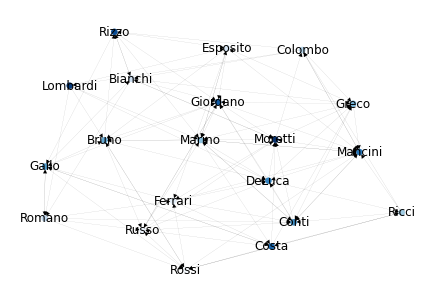

In [4]:
from networkx.drawing.nx_agraph import graphviz_layout, write_dot
import matplotlib.pyplot as plt

mafia_graph = make_enemies(surnames_list)

#2.1
def draw_graph(graph):
    nx.draw(graph, pos=graphviz_layout(graph), 
            node_size=30, width=.05, cmap=plt.cm.Blues, 
            with_labels=True, node_color=range(len(graph)))

draw_graph(mafia_graph_rivals)

#Support method
def get_rivals(mafia_graph, our_family):
    our_rivalries = list(mafia_graph.out_edges(our_family))
    our_rivals = list(rivalries[1] for rivalries in our_rivalries)
    return our_rivals

#2.2 & 2.3
def defeat_rival(mafia_graph, our_family, our_rival):
    their_rivalries = list(mafia_graph.in_edges(our_rival))
    their_rivals = list(rivalries[0] for rivalries in their_rivalries)
    our_rivals = get_rivals(mafia_graph, our_family)
    shared_rivals = set(our_rivals) & set(their_rivals)
    for rival in shared_rivals:
        #print('Removed ' + rival + ' from war between ' + our_family + ' and ' + our_rival) 
        their_rivals.remove(rival)
    return their_rivals

#2.4
def predict_war(mafia_graph, our_family, our_rival):
    prediction = {}
    prediction['our_side'] = defeat_rival(mafia_graph, our_family, our_rival)
    prediction['our_side'].append(our_family)
    prediction['our_size'] = len(prediction['our_side'])
    prediction['their_side'] = defeat_rival(mafia_graph, our_rival, our_family)
    prediction['their_side'].append(our_rival)
    prediction['their_size'] = len(prediction['their_side'])
    if (prediction['our_size'] > prediction['their_size']):
        prediction['outcome'] = 'We have the bigger alliance, and we are likely to WIN'
    elif (prediction['our_size'] < prediction['their_size']):
        prediction['outcome'] = 'They have the bigger alliance, and we are likely to LOSE'
    else:
        prediction['outcome'] = 'We are somewhat equally matched, and we are likely to DRAW'
    return prediction
    
random_int = random.randint(0, len(surnames_list)-1)
our_family = surnames_list[random_int]
print('Our family is ' + our_family)

rivals = get_rivals(mafia_graph, our_family)
print('Our rivals are the families: ' + str(rivals))

their_rivals = defeat_rival(mafia_graph, our_family, rivals[0])
print('We can ally ourselves with: ' + str(their_rivals) + ' against ' + rivals[0])

war_prediction = predict_war(mafia_graph, our_family, rivals[0])
print(war_prediction['outcome'])
print()
print(war_prediction)

# Assignment 3: Pay the dept
1. Draw a graph made with the owes_money method
2. Make a method pay_dept that takes a mafia_graph, and checks the balance for each surname, if all depts where to be payed.
3. Make a method make_business_empire, that uses the pay_dept method to find out the smallest list of richest surnames, that would together control over 50% of all the wealth.

In [7]:
from networkx.drawing.nx_agraph import graphviz_layout, write_dot
import matplotlib.pyplot as plt

mafia_graph = owes_money(surnames_list)

#3.1
def draw_graph(graph):
    nx.draw_networkx_edge_labels(graph, pos=graphviz_layout(graph), edge_labels=nx.get_edge_attributes(graph, 'weight'))
    nx.draw(graph, pos=graphviz_layout(graph), 
            node_size=30, width=.05, cmap=plt.cm.Blues, 
            with_labels=True, node_color=range(len(graph)))

#draw_graph(mafia_graph)

#3.2
def pay_dept(mafia_graph):
    families_balanaces = []
    for family in mafia_graph.nodes():
        family_balance = {
            'family':family,
            'owed':0,
            'dept':0,
            'balance':0
        }
        for edge in mafia_graph.out_edges(family):
            other_family = edge[1]
            family_balance['dept'] += mafia_graph[family][other_family]['weight']
        for edge in mafia_graph.in_edges(family):
            other_family = edge[0]
            family_balance['owed'] += mafia_graph[other_family][family]['weight']
        family_balance['balance'] = family_balance['owed'] - family_balance['dept']
        families_balanaces.append(family_balance)
    return families_balanaces

#Support method
def sort_by_balance(family):
    return family['balance']

#3.3
def make_business_empire(mafia_graph):
    families_balances = pay_dept(mafia_graph)
    total_positive_balance = 0
    for family_balance in families_balances:
        if family_balance['balance'] > 0:
            total_positive_balance += family_balance['balance']
            
    families_balances.sort(key=sort_by_balance, reverse=True)
    
    empire = []
    empire_balance = 0
    for family_balance in families_balances:
        empire.append(family_balance['family'])
        empire_balance += family_balance['balance']
        if(empire_balance > (total_positive_balance/2)):
            break
    
    return empire
    
    
    

families_balances = pay_dept(mafia_graph)
for family_balance in families_balances:
    print(len(families_balances))
    print(family_balance)
    break
    
print(pay_dept(mafia_graph))
#print(make_business_empire(mafia_graph))

20
{'family': 'Rossi', 'owed': 405671, 'dept': 246956, 'balance': 158715}
[{'family': 'Rossi', 'owed': 405671, 'dept': 246956, 'balance': 158715}, {'family': 'Russo', 'owed': 114397, 'dept': 377387, 'balance': -262990}, {'family': 'Ferrari', 'owed': 276348, 'dept': 332161, 'balance': -55813}, {'family': 'Esposito', 'owed': 128165, 'dept': 365643, 'balance': -237478}, {'family': 'Bianchi', 'owed': 241315, 'dept': 280683, 'balance': -39368}, {'family': 'Romano', 'owed': 338489, 'dept': 281505, 'balance': 56984}, {'family': 'Colombo', 'owed': 122653, 'dept': 221757, 'balance': -99104}, {'family': 'Ricci', 'owed': 361575, 'dept': 251005, 'balance': 110570}, {'family': 'Marino', 'owed': 325653, 'dept': 254156, 'balance': 71497}, {'family': 'Greco', 'owed': 222224, 'dept': 259474, 'balance': -37250}, {'family': 'Bruno', 'owed': 90708, 'dept': 228266, 'balance': -137558}, {'family': 'Gallo', 'owed': 126095, 'dept': 294244, 'balance': -168149}, {'family': 'Conti', 'owed': 351114, 'dept': 26793